# **도커_복습_2**

**도커 볼륨**

- 도커 이미지로 컨테이너를 생성하면 이미지는 읽기 전용이 되며 컨테이너의 변경 사항만 별도로 저장해서 각 컨테이너의 정보를 보존한다.
- 이미 생성된 이미지는 어떠한 경우로도 변경되지 않으며, 컨테이너 계층에 원래 이미지에서 변경된 파일시스템 등을 저장한다.

**호스트 볼륨 공유**

- `[호스트의 공유 디렉터리]:[컨테이너의 공유 디렉터리]`
- 컨테이너를 삭제해도 호스트의 디렉터리에는 그대로 남아 있다.
- **공유 디렉터리는 호스트와 동기화 되는 것이 아니라 완전히 같은 디렉터리이다.**
- 호스트의 디렉터리가 없으면 자동으로 생성된다.
- 이미 디렉터리가 존재한다면 컨테이너의 디렉터리 자체가 덮어씌워진다.

```bash
docker run -d --name wordpressdb_hostvolume -e MYSQL_ROOT_PASSWORD=password -e MYSQL_DATABASE=wordpress -v /home/wordpress_db:/var/lib/mysql mysql:5.7
```

```bash
docker run -d -e WORDPRESS_DB_HOST=mysql -e WORDPRESS_DB_USER=root -e WORDPRESS_DB_PASSWORD=password --name wordpress_hostvolume --link wordpressdb_hostvolume:mysql -p 80 wordpress
```

**볼륨 컨테이너**

- 볼륨을 사용하는 컨테이너를 다른 컨테이너와 공유할 수 있다.
- 컨테이너를 생성할 때 `--volumes-from` 옵션을 설정하면 -v 또는 —volume 옵션을 적용한 컨테이너의 볼륨 디렉터리를 공유할 수 있다.

**도커 볼륨**

- 볼륨을 다루는 명령어는 `docker volume`으로 시작하며, docker volume create 명령어로 볼륨을 생성한다.

```bash
docker volume create --name myvolume
docker volume ls
docker run -i -t --name myvolume_1 -v myvolume:/root/ ubuntu:14.04
```

- `docker inspect` 명령어를 사용하면 볼륨이 실제로 어디에 저장되는지 알 수 있다.
- docker inspect 명령어는 컨테이너, 이미지, 볼륨 등 도커의 모든 구성 단위의 정보를 확인할 때 사용된다.

```bash
docker inspect --type volume "볼륨명"
```

```bash
docker inspect --type volume "볼륨명"
```


- Dirver: 볼륨이 쓰는 드라이버
- Label: 볼륨을 구분하는 라벨
- Mountpoint: 해당 볼륨이 실제로 저장된 호스트의 경로
- -v 옵션을 다음과 같이 사용하면 무작위의 16진수 형태인 볼륨이 자동으로 만들어 진다.

```bash
docker run -it --name volume_auto -v /root ubuntu:14.04
```
- 사용되지 않는 볼륨 한꺼번에 삭제

```bash
docker volume prune
```



**도커 네트워크**



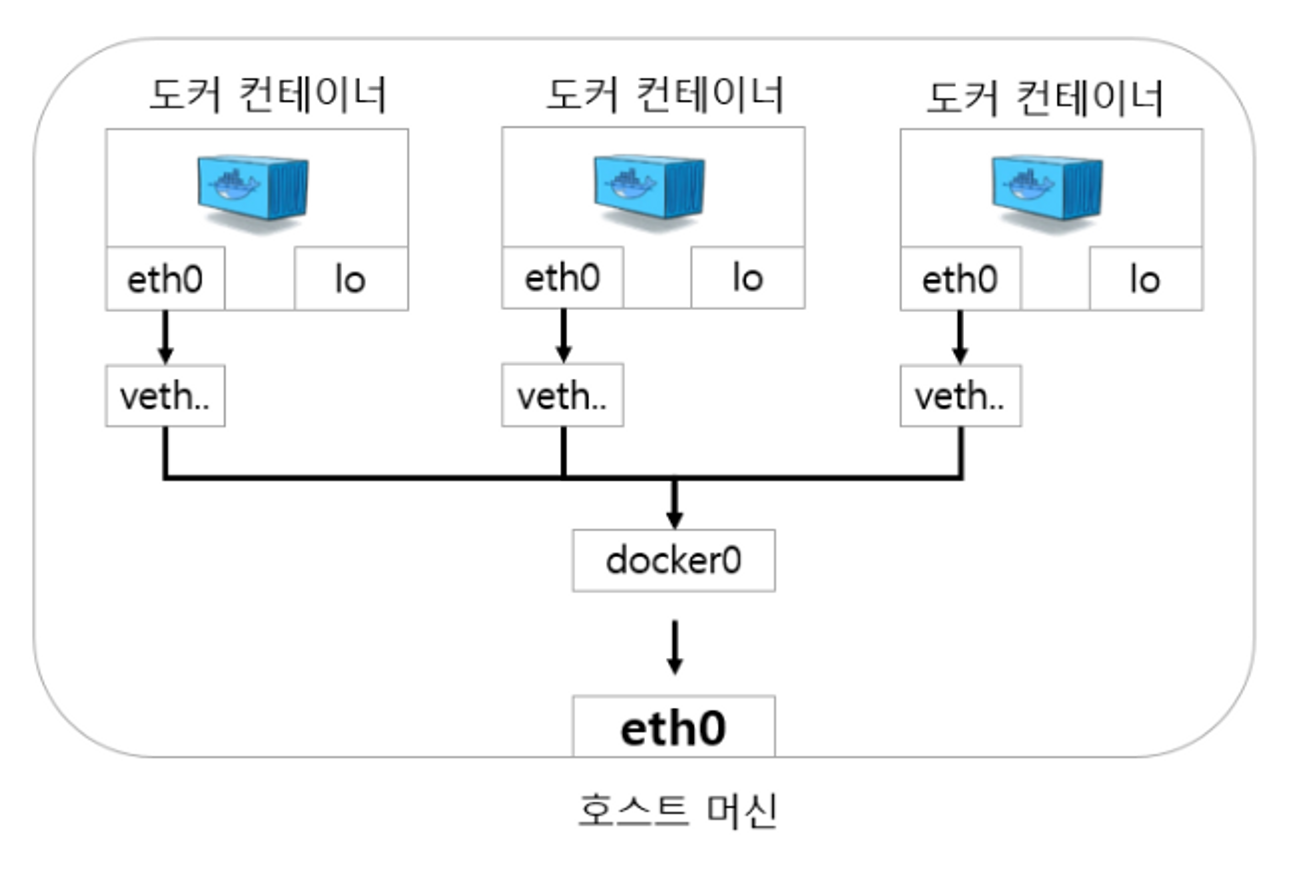

- docker0 브리지는 각 veth 인터페이스와 바인딩돼 호스트의 eth0 인터페이스와 이어주는 역할을 한다

**도커 네트워크 기능**

- 브리지 네트워크
    - docker0 브리지와 비슷하게 브리지 네트워크는 docker0이 아닌 사용자 정의 브리지를 새로 생성새 컨테이너에 연결하는 네트워크 구조이다.
    - 컨테이너는 연결된 브리지를 통해 외부와 통신할 수 있다.
    - 네트워크 서브넷, 게이트웨이, IP 할당 범위 등을 임의로 설정하려면 네트워크를 생성할 때 아래와 같이 —subnet, —ip-range, —gateway 옵션을 추가한다.
    - 단 —subnet 과 —ip-range 같은 대역이여야 한다.
    
    ```bash
    docker network create --driver=bridge --subnet=172.72.0.0/16 --ip-range=172.72.0.0/24 --gateway=172.72.0.1 my_custom_network
    ```
    
- 호스트 네트워크
    - 네트워크를 호스트로 설정하면 호스트의 네트워크 환경을 그대로 쓸 수 있다.
    - 컨테이너의 네트워크를 호스트 모드로 설정하면 컨테이너 내부의 애플리케이션을 별도의 포트 포워딩 없이 바로 서비스 할 수 있다.
- 논 네트워크
    - none 은 말 그대로 아무런 네트워크를 쓰지 않는 것을 뜻한다.
- 컨테이너 네트워크
    - —net 옵션으로 container 를 입력하면 다른 컨테이너의 네트워크 네임스페이스 환경을 공유할 수 있다.
    - 다른 컨테이너의 네트워크 환경을 공유하면 내부 IP 를 새로 할당받지 않으며 호스트에 veth 로 시작하는 가상 네트워크 인터페이스도 생성되지 않는다.
    
    ```bash
    docker run -it -d --name network_container_1 ubuntu:14.04
    docker run -it -d --name network_container_2 **--net container:network_container_1** ubuntu:14.04
    ```
    
- 브리지 네트워크와 —net-alias
    - 브리지 타입의 네트워크와 run 명령어의 —net-alias 옵션을 함께 쓰면 특정 호스트 이름으로 컨테이너 여러 개에 접근할 수 있다.
    
    ```bash
    docker run -it -d --name network_alias_container1 --net my_custom_network --net-alias alicek106 ubuntu:14.04
    docker run -it -d --name network_alias_container2 --net my_custom_network --net-alias alicek106 ubuntu:14.04
    docker run -it -d --name network_alias_container3 --net my_custom_network --net-alias alicek106 ubuntu:14.04
    ```
    
    - 생성한 —net-alias 호스트 이름으로 ping 요청을 보내보면 생성한 컨테이너 3개의 IP 로 각각 ping 이 전송된 것을 확인할 수 있다.
    - 라운드 로빈 방식으로 요청한다.
- MacVLAN 네트워크
    - 호스트의 네트워크 인터페이스 카드를 가상화해 물리 네트워크 환경을 컨테이너에게 동일하게 제공한다.

**컨테이너 로깅**

### json-file 로그 사용하기

- `docker logs` 명령어로 로그 확인 가능
- —tail 옵션을 써서 마지막 로그 줄부터 출력할 줄의 수를 설정할 수 있다.

```bash
docker logs --tail 2 mysql
```

- —since 옵션에 유닉스 시간을 입력해 특정 시간 이후의 로그를 확인할 수 있으며, -t 옵션으로 타임스탬프를 표시할 수도 있다.
- 컨테이너에서 실시간으로 출력되는 내용을 확인하려면 -f 옵션을 써서 로그를 스트림으로 확인할 수 있다.

```bash
docker logs --since 1474765979 mysql
docker logs -f -t mysql
```

- 기본적으로 컨테이너 로그는 JSON 형태로 도커 내부에 저장된다. 이파일은 다음 경로에 컨테이너의 ID 로 시작하는 파일명으로 저장된다.
    - `/var/lib/docker/containers/${CONTAINER_ID}/${CONTAINER_ID}-json.log`
- —log-opt 옵션으로 컨테이너의 json 로그 파일의 최대 크기를 지정할 수 있다. max-size 는 로그 파일의 최대 크기, max-file 은 로그 파일의 개수를 의미

```bash
docker run -it --log-opt max-size=10k --log-opt max-file=3 --name log-test ubuntu:14.04
```

- 도커 데몬 시작 옵션에서 —log-driver 옵션을 써서 기본적으로 사용할 로깅 드라이버를 변경할 수도 있고, —log-opt 옵션을 모든 컨테이너에 일괄 적용할수도 있다.
    - 사용 가능한 드라이버의 대표적인 예로 syslog, journald, fluentd, awslogs 등이 있다.

**syslog 로그**

- syslog 는 유닉스 계열 운영체제에서 로그를 수집하는 오래된 표준 중 하나로서, 커널, 보안 등 시스템과 관련된 로그, 애플리케이션의 로그 등 다양한 종류의 로그를 수집해 저장한다.

**fluentd 로깅**

- fluentd 는 각종 로그를 수집하고 저장할 수 있는 기능을 제공하는 오픈소스 도구로서, 도커 엔진의 컨테이너의 로그를 fluentd 를 통해 저장할 수 있도록 플러그인을 공식적으로 제공한다.

- fluent.conf 파일 생성
    - 들어오는 로그 데이터를 몽고DB 에 전송하고, access 라는 이름의 컬렉션에 로그를 저장하며, 몽고DB  컨테이너의 호스트 주소와 포트를 지정한다.
    - <match docker.**> 는 로그의 태그가 docker 로 시작하면 이를 몽고DB 에 전달하는 것이다.
    - host 는 몽고DB 의 ip
    
    ```bash
    <source>
      @type forward
    </source>
    
    <match docker.**>
      @type mongo
      database nginx
      collection access
      host 172.17.0.4
      port 27017
      flush_interval 10s
    </match>
    ```
    
    ```bash
    docker run -d --name fluentd -p 24224:24224 -v $(pwd)/fluent.conf:/fluentd/etc/fluent.conf -e FLUENTD_CONF=fluent.conf alicek106/fluentd:mongo
    ```
    
    - 도커 허브의 fluentd 이미지에는 몽고DB 에 연결하는 플러그인이 내장돼 있지 않다. alicek106/fluentd:mongo 이미지는 공싱 fluentd 이미지에 몽고DB 플러그인을 설치한 것이다.
- 도커 서버에서 로그를 수집할 컨테이너를 생성
    
    ```bash
    docker run --name nginx -p 10080:80 -d --log-driver=fluentd --log-opt fluentd-address=172.17.0.5:24224 --log-opt tag=docker.nginx.webserver nginx
    ```
    
- mongoDB 컨테이너에 들어가서 확인
    
    ```bash
    # docker exec -it mongoDB mongo
    >show dbs
    >use nginx
    >show collections
    >db['address'].find()
    ```

**아마존 클라우드워치 로그**

- 클라우드워치에 해당하는 IAM 권한 생성
- 로그 그룹 생성
- 로그 그룹에 로그 스트림(LogStream) 생성
- 클라우드워치의 IAM 권한을 사용할 수 있는 EC2 인스턴스 생성과 로그 전송

**컨테이너 자원 할당 제한**

- run 명령어에서 설정된 컨테이너의 자원 제한을 변경하려면 `update` 명령어를 사용
    
    ```bash
    docker update `변경할 자원 제한` `컨테이너 이름`
    docker update --cpuset-cpus=1 centos ubuntu
    ```
    

**컨테이너 메모리 제한**

- docker run 명령어에 `—memory` 를 지정해 컨테이너의 메모리를 제한할 수 있다.
    - m(megabyte), g(gigabyte)
    - 제한할 수 있는 최소 메모리 4MB
    
    ```bash
    docker run -d --memory="1g" --name memory_1g nginx
    
    # docker inspect 로 메모리 확인
    docker inspect memory_1g | grep \"Memory\"
    ```
    
- **컨테이너 내에서 동작하는 프로세스가 컨테이너에 할당된 메모리를 초과하면 컨테이너는 자동으로 종료되므로 메모리를 적절하게 할당하자.**
- swap 메모리
    - 물리 메모리의 용량이 부족할 때 하드 디스크의 일부 공간을 메모리 처럼 사용하는 것이다.

**컨테이너 CPU 제한**

- `—cpu-shares`
    - 컨테이너에 가중치를 설정해 해당 컨테이너가 CPU 를 상대적으로 얼마나 사용할 수 있는지를 나타낸다.
    - 컨테이너에 CPU 를 한 개씩 할당하는 방식이 아닌, 시스템에 존재하는 CPU 를 어느 비중만큼 나눠 쓸 것인지를 명시하는 옵션
    
    ```bash
    docker run -it --name cpu_share --cpu-shares 1024 ubuntu:14.04
    ```
    
- `--cpuset-cpu`
    - 호스트에 CPU 가 여러 개 있을 때 —cpuset-cpus 옵션을 지정해 컨테이너가 특정 CPU 만 사용하도록 설정할 수 있다.
    
    ```bash
    docker run -d --name cpuset_2 --cpuset-cpus=2 alicek106/stress stress --cpu 1
    ```
    
- `cpu-period`, `--cpu-quota`
    - 컨테이너의 CFS(Completely Fair Scheduler) 주기는 기본적으로 100ms 로 설정되지만 run 명령어의 옵션 중 이 두가지로 주기를 변경할 수 있다.
    - 컨테이너는 [—cpu-quota 값] / [—cpu-period 값] 만큼 CPU 시간을 할당받는다.
    
    ```bash
    docker run -d --name quota_1_4 --cpu-period=100000 --cpu-quota=25000 alicek106/stress stress --cpu 1
    ```
    
- `--cpus`
    - —cpu-period, —cpu-quota 와 동일한 기능을 하지만 좀 더 직관적으로 CPU 의 개수를 직접 지정한다.
- **병령 처리를 위해 CPU 를 많이 소모하는 워크로드를 수행해야 한다면 —cpu-share, —cpus, —cpu-period, —cpu-quota 옵션보다는 —cpuset-cpu 옵션을 사용하는 것이 좋다.**

**Block I/O 제한**

- —device-write-bps, —device-read-bps, —device-write-iops, —device-read-iops 옵션을 지정해 블록 입출력을 제한할 수 있다.
- 단, Direct I/O 의 경우에만 블록 입출력이 제한되며, Buffered I/O 는 제한되지 않는다.

```bash
docker run -it --device-write-bps /dev/loop0:1mb ubuntu:14.04

# 위 명령어 수행해서 컨테이너 들어가서 실행
dd if=/dev/zero of=test.out bs=1M count=10 oflag=direct
```
